In [4]:
%matplotlib inline

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import string
import collections

In [5]:
df = pd.read_csv("../data/scrubbed.csv")
c_df = df
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
# Object column into string
c_df['comments'] = c_df['comments'].astype(str)

# All to lower caps
c_df.comments = c_df.comments.apply(lambda x: x.lower())

# Remove punctuation
c_df['comments'] = c_df['comments'].str.replace('[^\w\s]','')

c_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,this event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 lackland afb44 tx lights racing across t...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,greenorange circular disc over chester44 england,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,my older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,as a marine 1st lt flying an fj4b fighterattac...,1/22/2004,21.4180556,-157.803611


In [7]:
#Remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
c_df['comments'] = c_df['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deninc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Stemmer
from __future__ import print_function
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
c_df['comments'] = c_df['comments'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

c_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,event took place earli fall around 194950 occu...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 lackland afb44 tx light race across sky a...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,greenorang circular disc chester44 england,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,older brother twin sister leav edna theater 9 ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,marin 1st lt fli fj4b fighterattack aircraft s...,1/22/2004,21.4180556,-157.803611


In [9]:
# write to text file
file_comments = open("../data/ufo_comments_descriptions.txt", "w")
for row in c_df.itertuples(index=True, name='Pandas'):
    val = getattr(row, "comments")
    file_comments.write(val)
file_comments.close()

Read from text file that was made above, and do stuff

In [10]:
# Most common words
comments_df = pd.read_table("../data/ufo_comments_descriptions.txt", header=None)
comments_df.columns = ["comments"]

comments_most_common = collections.Counter(" ".join(comments_df["comments"].dropna()).split()).most_common(10)
print("Most common words in comments/descriptions:")
print(comments_most_common)

Most common words in comments/descriptions:
[('light', 29268), ('object', 15049), ('move', 11702), ('sky', 10543), ('shape', 8360), ('bright', 7577), ('white', 5951), ('orang', 5603), ('seen', 5128), ('fli', 5092)]


In [11]:
#tf/idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore too common terms (max_df = .25)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments_df['comments'])
# print(vectorizer.get_feature_names())

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [12]:
# sort by means of words
comments_highest =  [vectorizer.get_feature_names()[id] for id in (-X.mean(axis=0).A).argsort()[0][:10]]
print("Comments highest score")
print(comments_highest)

Comments highest score
['light', 'object', 'move', 'sky', 'shape', 'bright', 'white', 'orang', 'seen', 'fli']


In [15]:
words = vectorizer.get_feature_names()
scores = pd.DataFrame({'word': words, 'pos': X[0].toarray()[0]})

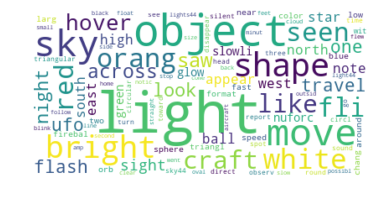

In [17]:
from wordcloud import WordCloud

def cloud(d):
    wc = WordCloud(background_color="white")
    wc.generate_from_frequencies(d)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

top_pos = scores.sort_values(by="pos", ascending=False).head(100)
cloud(dict(zip(top_pos.word, top_pos.pos)))